In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
data.shape

(500, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
data.drop('Serial No.',axis=1,inplace=True)

In [9]:
for col in data:
    data[col].unique()
    print(data[col].unique())

[337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]
[118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92]
[4 3 2 5 1]
[4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
[4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
[9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04
 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76 7.92
 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8.12 8.25 8.47 9.05 8.78 9.18
 9.46 9.38 8.48 8.68 8.34 8.45 8.62 7.46 7.28 8.84 9.56 9.48 8.36 9.32
 8.71 9.35 8.65 9.28 8.77 8.16 9.08 9.12 9.15 9.44 9.92 9.11 8.26 9.43
 9.06 8.75 8.89 8.69 7.86 9.01 8.97 8.33 8.27 7.98 8.04 9.07 9.13 9.23
 8.32 8.98 8.94 9.53 8.52 8

In [10]:
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [11]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
data.columns = data.columns.str.strip()

In [13]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [14]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [15]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value,abs-rmv ngtv value,alwys use ngvt value so use abs
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(data, 0.9)
len(set(corr_features))


0

In [16]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [17]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

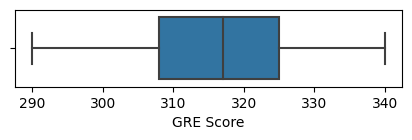

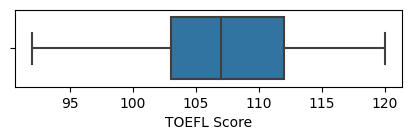

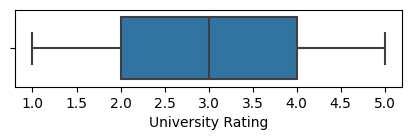

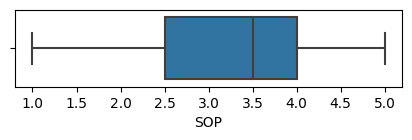

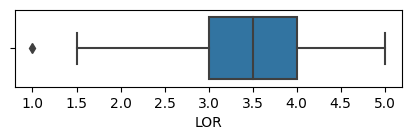

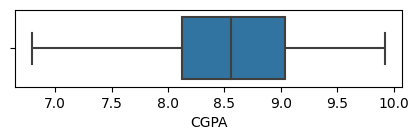

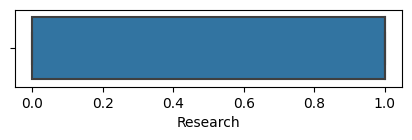

In [18]:
for column in data.iloc[:,:-1]:
        plt.figure(figsize=(5,1))
        sns.boxplot(data=data, x=column)

In [19]:
# var=data.columns.values.tolist()
# y=data['Chance of Admit']
# X=[i for i in var if i not in ['Chance of Admit']]
# X=data[X]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,
                                                    random_state=0)
X_train.shape, X_test.shape

((375, 7), (125, 7))

In [21]:
## Standardize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
X_train=scaler.fit_transform(X_train)

In [23]:
X_test=scaler.transform(X_test)

In [24]:
from sklearn.svm import SVR
svr_regression = SVR(kernel='linear')
svr_regression.fit(X_train,y_train)

SVR(kernel='linear')

In [25]:
svr_regression.score(X_test,y_test)

0.7603338779377147

In [26]:
print(svr_regression.coef_)

[[0.01232167 0.02871458 0.00485202 0.0040235  0.01455602 0.0686382
  0.00736909]]


In [27]:
print(svr_regression.intercept_)

[0.70181252]


In [28]:
## PRediction for the test data
svr_pred=svr_regression.predict(X_test)
svr_pred

array([0.6308512 , 0.81638147, 0.75071493, 0.84996495, 0.58422048,
       0.62854054, 0.5224938 , 0.6946821 , 0.51706301, 0.71217063,
       0.58944125, 0.67404941, 0.59762017, 0.74301788, 0.85012407,
       0.4978624 , 0.78787571, 0.62154211, 0.73617719, 0.53007296,
       0.50597932, 0.68155583, 0.51544609, 0.88926422, 0.80420399,
       0.70139365, 0.6878046 , 0.47920697, 0.56433131, 0.57595276,
       0.69265604, 0.47504315, 0.64628962, 0.80346388, 0.54568803,
       0.57016089, 0.80436158, 0.83886144, 0.58461601, 0.63722832,
       0.64976466, 0.86476053, 0.83922132, 0.70693562, 0.74351706,
       0.7661107 , 0.94273729, 0.82626123, 0.63553128, 0.64102264,
       0.61695924, 0.60088954, 0.59768691, 0.77215952, 0.67681516,
       0.81962649, 0.52322238, 0.83348875, 0.59658181, 0.62565443,
       0.47733765, 0.87327573, 0.60369597, 0.90780919, 0.6996119 ,
       0.60896939, 0.69517337, 0.81767624, 0.50052803, 0.74431043,
       0.8637603 , 0.76319469, 0.67453759, 0.61281827, 0.76640

Text(0, 0.5, 'Test Predicted Data')

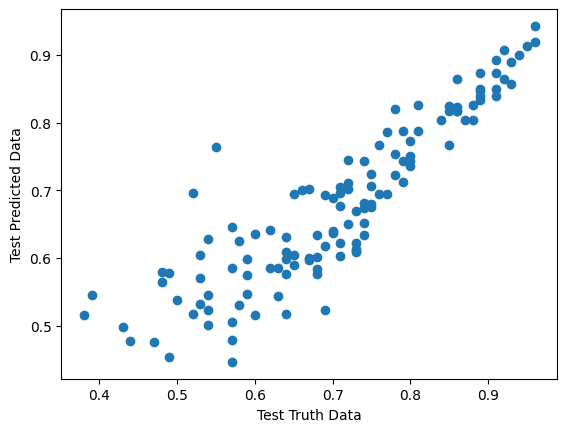

In [29]:
plt.scatter(y_test,svr_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [30]:
## residuals
residuals=y_test-svr_pred
residuals

90     0.009149
254    0.033619
283    0.049285
445    0.060035
461    0.095780
         ...   
430    0.105887
49     0.057325
134    0.043514
365    0.042685
413   -0.087631
Name: Chance of Admit, Length: 125, dtype: float64

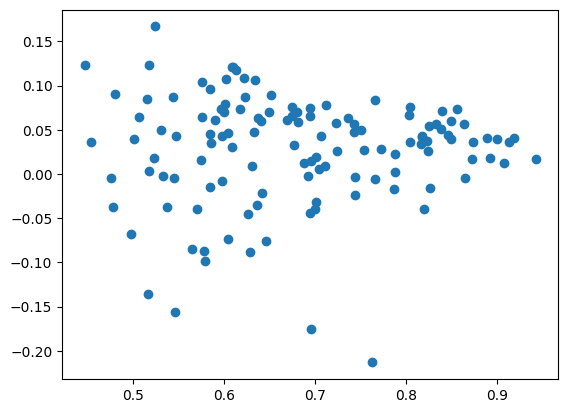

In [31]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(svr_pred,residuals)

In [32]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,svr_pred))
print(mean_absolute_error(y_test,svr_pred))
print(np.sqrt(mean_squared_error(y_test,svr_pred)))

0.004517877426618782
0.055047456267894965
0.06721515771475049


In [33]:
from sklearn.metrics import r2_score
score=r2_score(y_test,svr_pred)
print(score)

0.7603338779377147


In [34]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7459948791818515